### Log Regression Model Tuning for 2016 - 2020 Data (exports)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import modelinghelper as helper

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib
import os
from datetime import datetime

# supress future warnings
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
#set up random seed
rng = 42

# set up folder to save results
output_path = 'export_run4_TargetEncoding_gridsearchCV'
dataset = 'export'

if not os.path.exists(output_path):
    os.makedirs(output_path)
else:
    print("Folder already exists")

# file name
prefix = f'{output_path}/{dataset}'

Folder already exists


In [3]:
# read in data
p = '../data/'
input_name = 'cleaned.csv'

df = pd.read_csv(f'{p}{input_name}')

In [4]:
df['ship_date_mm'] = df['ship_date_mm'].astype(str)

In [5]:
df.describe()

,control_number,qty,value,qty_new,ship_date_yyyy
count,1.890132e+06,1.890132e+06,1.890132e+06,1.890132e+06,1.890132e+06
mean,2.018142e+09,1.955213e+06,9.658016e+03,1.954949e+06,2.017558e+03
std,1.263350e+06,2.644078e+08,9.355053e+05,2.644078e+08,1.279415e+00
min,2.014539e+09,-1.000000e+00,0.000000e+00,-1.000000e+00,2.016000e+03
25%,2.016978e+09,1.500000e+00,5.100000e+01,1.000000e+00,2.016000e+03
50%,2.017984e+09,9.000000e+00,3.180000e+02,8.000000e+00,2.017000e+03
75%,2.019505e+09,9.300000e+01,2.104000e+03,8.600000e+01,2.019000e+03
max,2.020755e+09,9.990708e+10,1.242236e+09,9.990708e+10,2.020000e+03


In [6]:
non_feature_cols = ['control_number', 'disp_date', 'i_e', 'ship_date', 
                    'cartons', 'qty', 'unit', 'specific_generic_name',
                    'genus', 'species', 'wildlf_cat', 
                    'disp_date_yyyy', 'disp_date_mm', 'disp_ship_date']

target = ['act', 'dp_cd']

feature_cols = ['species_code', 'wildlf_desc', 'wildlf_cat',
                'ctry_org', 'ctry_ie','purp', 'src', 'trans_mode', 'pt_cd', 
                 'value', 'ship_date_mm']

export_df = helper.df_filtering(df, i_e = 'E', f_cols = feature_cols)
# import: 590505 rows × 11 columns
# export: 299340 rows × 11 columns

#### Modeling Pipeline

In [7]:
X_train, X_test, y_train, y_test = helper.data_split(export_df)

#### Log Regression

In [8]:
clf = LogisticRegression(random_state=rng)
lr_params={
    'clf__class_weight':[None,
                         'balanced', 
                         {0:100, 1:1}, 
                         {0:50, 1:1}],
    'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.1, 0.5, 1, 5, 10, 50, 100]
}

%time lr_pipe = helper.gridsearch_pipeline(X_train, y_train, clf, lr_params) 
lr_pipe

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.7s
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.7s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.7s
[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.7s
[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.7s
[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.182 total time=   1.8s
[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.213 total time=   1.8s
[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.7s
[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=liblinear;, score=0.225 total time=   1.8s
[CV 5/5] END clf__C=0

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   4.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   4.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   4.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   4.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   4.6s
[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.7s
[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.7s
[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.7s
[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.7s
[CV 5/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.7s
[CV 1/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.7s
[CV 3/5] END clf__C=0.1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.7s
[CV 4/5] END clf__C=0.1, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.036 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.039 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.016 total time=   4.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.034 total time=   4.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   4.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   4.6s
[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   1.8s
[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   1.8s
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   1.8s
[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   1.8s
[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   1.8s
[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.8s
[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.8s
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.8s
[CV 4/5

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.026 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.044 total time=   4.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.039 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   4.7s
[CV 3/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   4.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   4.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   4.7s
[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.7s
[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.7s
[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.7s
[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.7s
[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.7s
[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.7s
[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=liblinear;, score=0

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   5.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   5.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   5.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   5.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   4.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   4.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   5.8s
[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.7s
[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.7s
[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.7s
[CV 5/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.7s
[CV 1/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.9s
[CV 3/5] END clf__C=0.5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=0.5, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.026 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   6.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   5.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.016 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.023 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.005 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   5.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   5.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   5.6s
[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   1.8s
[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   1.8s
[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   1.8s
[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.8s
[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.8s
[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.8s
[CV 4/5

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.016 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.044 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   4.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.036 total time=   5.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=0.5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   5.0s
[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.7s
[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.7s
[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.7s
[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=liblinear;, score=0.228 total time=  

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   5.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   6.1s
[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.7s
[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.7s
[CV 5/5] END clf__C=1, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.7s
[CV 1/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.7s
[CV 3/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=1, clf__class_weight=balanced, clf__solver=liblinear;, 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.000 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   5.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.018 total time=   5.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.021 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.010 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   5.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   5.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   5.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   5.4s
[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   1.8s
[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   1.9s
[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   1.8s
[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   1.9s
[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.8s
[CV 4/5] END clf__C=1, cl

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.018 total time=   4.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.047 total time=   5.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.036 total time=   5.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   5.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   5.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   5.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   5.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=1, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   6.0s
[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.8s
[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.8s
[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.9s
[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=liblinear;, score=0.228 total time=   1

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   5.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   4.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   5.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   5.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   5.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   6.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   6.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   6.0s
[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.8s
[CV 5/5] END clf__C=5, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.8s
[CV 1/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.9s
[CV 2/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=5, clf__class_weight=balanced, clf__solver=liblinear;, 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.034 total time=   5.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   5.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.016 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.036 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.010 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.1s
[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   2.0s
[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   2.0s
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   2.1s
[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   2.0s
[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   2.0s
[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   2.0s
[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   2.0s
[CV 4/5] END clf__C=5, cl

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.026 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.044 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   6.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.036 total time=   5.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=5, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   5.7s
[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.8s
[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.8s
[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.9s
[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.9s
[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.9s
[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=liblinear;, score=0.228 total 

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   6.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   6.9s
[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.9s
[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.8s
[CV 5/5] END clf__C=10, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.9s
[CV 1/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.9s
[CV 2/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.9s
[CV 3/5] END clf__C=10, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   2.0s
[CV 4/5] END clf__C=10, clf__class_weight=balanced, clf__solver=li

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.000 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.018 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.023 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.010 total time=   7.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.5s
[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   2.0s
[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   2.0s
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   2.1s
[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   2.0s
[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   2.0s
[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.9s
[CV 4/5] END clf

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.021 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.042 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.036 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=10, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   6.6s
[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.8s
[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.7s
[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.9s
[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.9s
[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=liblinear;, score=0.228 total

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   7.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   7.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   6.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   6.4s
[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.7s
[CV 5/5] END clf__C=50, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.8s
[CV 1/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.9s
[CV 2/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.9s
[CV 3/5] END clf__C=50, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=50, clf__class_weight=balanced, clf__solver=li

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.010 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   6.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   5.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.021 total time=   6.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.023 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.008 total time=   6.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   7.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   7.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   7.0s
[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   2.0s
[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   2.0s
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   2.0s
[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   1.9s
[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   1.9s
[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.9s
[CV 4/5] END clf

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.021 total time=   6.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.047 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.039 total time=   7.0s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   6.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   7.3s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=50, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   6.5s
[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.190 total time=   1.8s
[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.216 total time=   1.8s
[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.228 total time=   1.8s
[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=lbfgs;, score=0.197 total time=   1.8s
[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.190 total time=   1.9s
[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.216 total time=   1.9s
[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.203 total time=   1.8s
[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=liblinear;, score=0.

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.216 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.203 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.228 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=sag;, score=0.197 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.190 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.216 total time=   6.6s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.205 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.228 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight=None, clf__solver=saga;, score=0.197 total time=   6.5s
[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.587 total time=   1.8s
[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.530 total time=   1.8s
[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.574 total time=   1.8s
[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.593 total time=   1.8s
[CV 5/5] END clf__C=100, clf__class_weight=balanced, clf__solver=lbfgs;, score=0.528 total time=   1.9s
[CV 1/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.587 total time=   1.9s
[CV 2/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.530 total time=   1.9s
[CV 3/5] END clf__C=100, clf__class_weight=balanced, clf__solver=liblinear;, score=0.574 total time=   1.9s
[CV 4/5] END clf__C=100, clf__class_weight=balanced, clf_

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.010 total time=   6.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.013 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.044 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.021 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=sag;, score=0.021 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.008 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.023 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.042 total time=   7.1s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.016 total time=   5.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 100, 1: 1}, clf__solver=saga;, score=0.034 total time=   6.5s
[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.044 total time=   2.0s
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.055 total time=   1.9s
[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.034 total time=   1.9s
[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=lbfgs;, score=0.039 total time=   1.9s
[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.021 total time=   1.9s
[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.044 total time=   1.9s
[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=liblinear;, score=0.055 total time=   1.9s
[CV 4/5

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.013 total time=  35.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.047 total time=   6.8s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.057 total time=   6.9s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.034 total time=   5.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=sag;, score=0.036 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.026 total time=   6.5s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.042 total time=   6.4s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.055 total time=  30.7s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.034 total time=   7.2s


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END clf__C=100, clf__class_weight={0: 50, 1: 1}, clf__solver=saga;, score=0.039 total time=   8.2s
Grid best parameter (max. recall):  {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
Grid best score (recall):  0.5625341497880358
CPU times: user 37min 44s, sys: 2min 28s, total: 40min 12s
Wall time: 33min 11s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('targetEncoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['species_code',
                                                                          'wildlf_desc',
                                                                          'wildlf_cat',
                                                                          'ctry_org',
                                                                          'ctry_ie',
                                                                          'purp',
                                                                          'src',
                                                                          'trans_mode',
                                                                          'pt_cd',
                                                                          'ship_date_mm'])])),
                                       ('standardScaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'clf__class_weight': [None, 'balanced', {0: 100, 1: 1},
                                               {0: 50, 1: 1}],
                         'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall', verbose=3)

In [9]:
joblib.dump(lr_pipe, f'{prefix}_lr_pipe.joblib')

['export_run4_TargetEncoding_gridsearchCV/export_lr_pipe.joblib']

#### Evaluation

Log Regression (best model)
 [[  362   281]
 [ 7825 66367]]


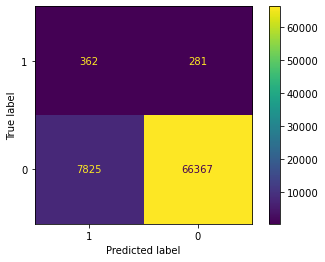

In [11]:
outputs = True
lr_predicted = lr_pipe.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted, labels = [1,0])
if outputs:
    print('Log Regression (best model)\n', confusion)
cm_display = ConfusionMatrixDisplay(confusion, display_labels=[1,0])
if outputs:
    cm_display.plot()
    
    

In [12]:
lr_pipe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('targetEncoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['species_code',
                                                                          'wildlf_desc',
                                                                          'wildlf_cat',
                                                                          'ctry_org',
                                                                          'ctry_ie',
                                                                          'purp',
                                                                          'src',
                                                                          'trans_mode',
                                                                          'pt_cd',
                                                                          'ship_date_mm'])])),
                                       ('standardScaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'clf__class_weight': [None, 'balanced', {0: 100, 1: 1},
                                               {0: 50, 1: 1}],
                         'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall', verbose=3)

In [18]:
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     74192
           1       0.04      0.56      0.08       643

    accuracy                           0.89     74835
   macro avg       0.52      0.73      0.51     74835
weighted avg       0.99      0.89      0.94     74835



In [15]:
print(lr_pipe.best_params_)
print(lr_pipe.best_score_)

{'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
0.5625341497880358


In [16]:
pd.DataFrame(lr_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__class_weight,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.606230,0.016171,0.106671,0.000634,0.1,None,lbfgs,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.189610,0.215584,0.202597,0.227979,0.196891,0.206533,0.013687,36
1,1.657499,0.024733,0.101946,0.000648,0.1,None,liblinear,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.181818,0.212987,0.202597,0.225389,0.194301,0.203418,0.014998,56
2,4.423288,0.123471,0.102240,0.001113,0.1,None,sag,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.189610,0.215584,0.202597,0.227979,0.196891,0.206533,0.013687,36
3,4.587316,0.100287,0.104099,0.001855,0.1,None,saga,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.189610,0.215584,0.205195,0.227979,0.196891,0.207052,0.013577,29
4,1.570933,0.011139,0.105715,0.002128,0.1,balanced,lbfgs,"{'clf__C': 0.1, 'clf__class_weight': 'balanced...",0.587013,0.529870,0.574026,0.593264,0.528497,0.562534,0.027932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,6.395761,0.361358,0.110545,0.002595,100,"{0: 100, 1: 1}",saga,"{'clf__C': 100, 'clf__class_weight': {0: 100, ...",0.007792,0.023377,0.041558,0.015544,0.033679,0.024390,0.012131,106
108,1.829165,0.027320,0.111092,0.002460,100,"{0: 50, 1: 1}",lbfgs,"{'clf__C': 100, 'clf__class_weight': {0: 50, 1...",0.020779,0.044156,0.054545,0.033679,0.038860,0.038404,0.011196,68
109,1.813728,0.048706,0.113980,0.010290,100,"{0: 50, 1: 1}",liblinear,"{'clf__C': 100, 'clf__class_weight': {0: 50, 1...",0.020779,0.044156,0.054545,0.033679,0.038860,0.038404,0.011196,68
110,12.024664,11.541600,0.133138,0.039950,100,"{0: 50, 1: 1}",sag,"{'clf__C': 100, 'clf__class_weight': {0: 50, 1...",0.012987,0.046753,0.057143,0.033679,0.036269,0.037366,0.014754,83
